In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [76]:
raw_data = pd.read_csv('data/train.csv')
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
raw_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [78]:
raw_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

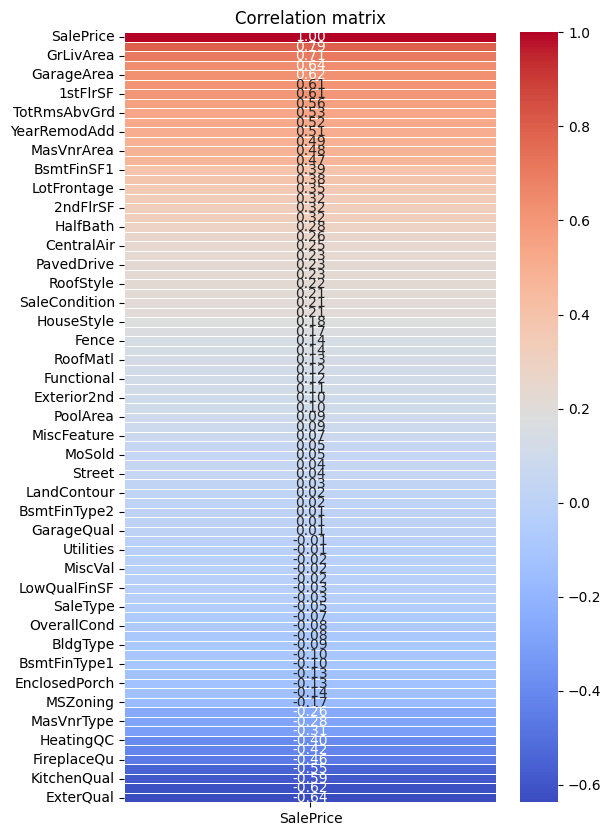

In [79]:
transform_data = raw_data.copy()
categorical_cols = transform_data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    label_encoder.fit(transform_data[col])
    transform_data[col] = label_encoder.transform(transform_data[col])

corr_matrix = transform_data.corr()['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(corr_matrix.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

In [80]:
high_corr_columns = selected_features = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)].index
high_corr_columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual'],
      dtype='object')

In [81]:
data = transform_data[high_corr_columns]

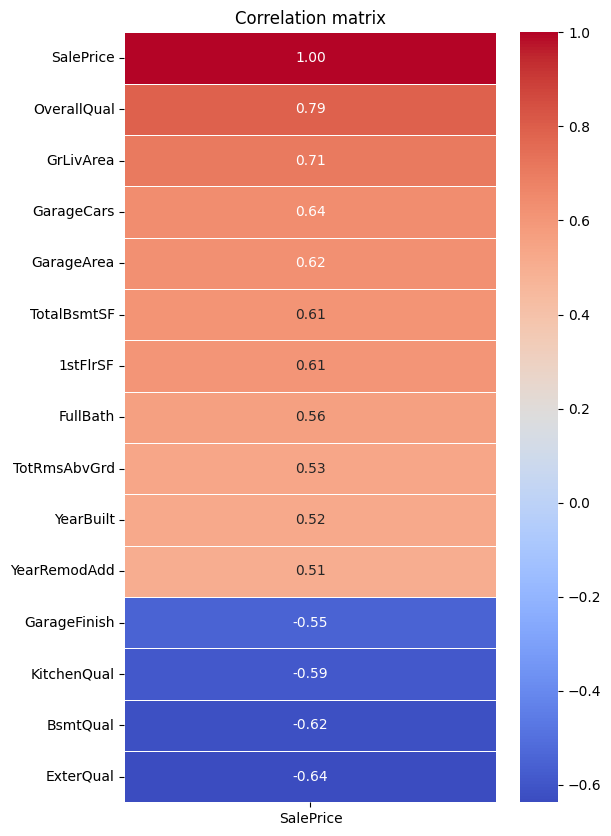

In [82]:
corr_matrix = data.corr()['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(corr_matrix.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

In [83]:
data.describe(include='all')

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish,KitchenQual,BsmtQual,ExterQual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,1.284247,2.339726,2.305479,2.539726
std,79442.502883,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,0.892831,0.830161,0.899225,0.693995
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,1.000000,2.000000,2.000000,2.000000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,1.000000,3.000000,2.000000,3.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,2.000000,3.000000,3.000000,3.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,3.000000,3.000000,4.000000,3.000000


In [84]:
data.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageFinish    0
KitchenQual     0
BsmtQual        0
ExterQual       0
dtype: int64

In [85]:
def plot_histograms(data: pd.DataFrame, n_cols: int = 3):
    columns = data.columns
    n_rows = (len(columns) // n_cols) + (len(columns) % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    
    for i, col in enumerate(columns):
        row = i // n_cols
        col_pos = i % n_cols
        ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]
        sns.histplot(data[col], kde=True, stat="density", ax=ax)
        ax.set_title(col)
    
    if len(columns) % n_cols != 0:
        for j in range(len(columns), n_rows * n_cols):
            fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout()
    plt.show()

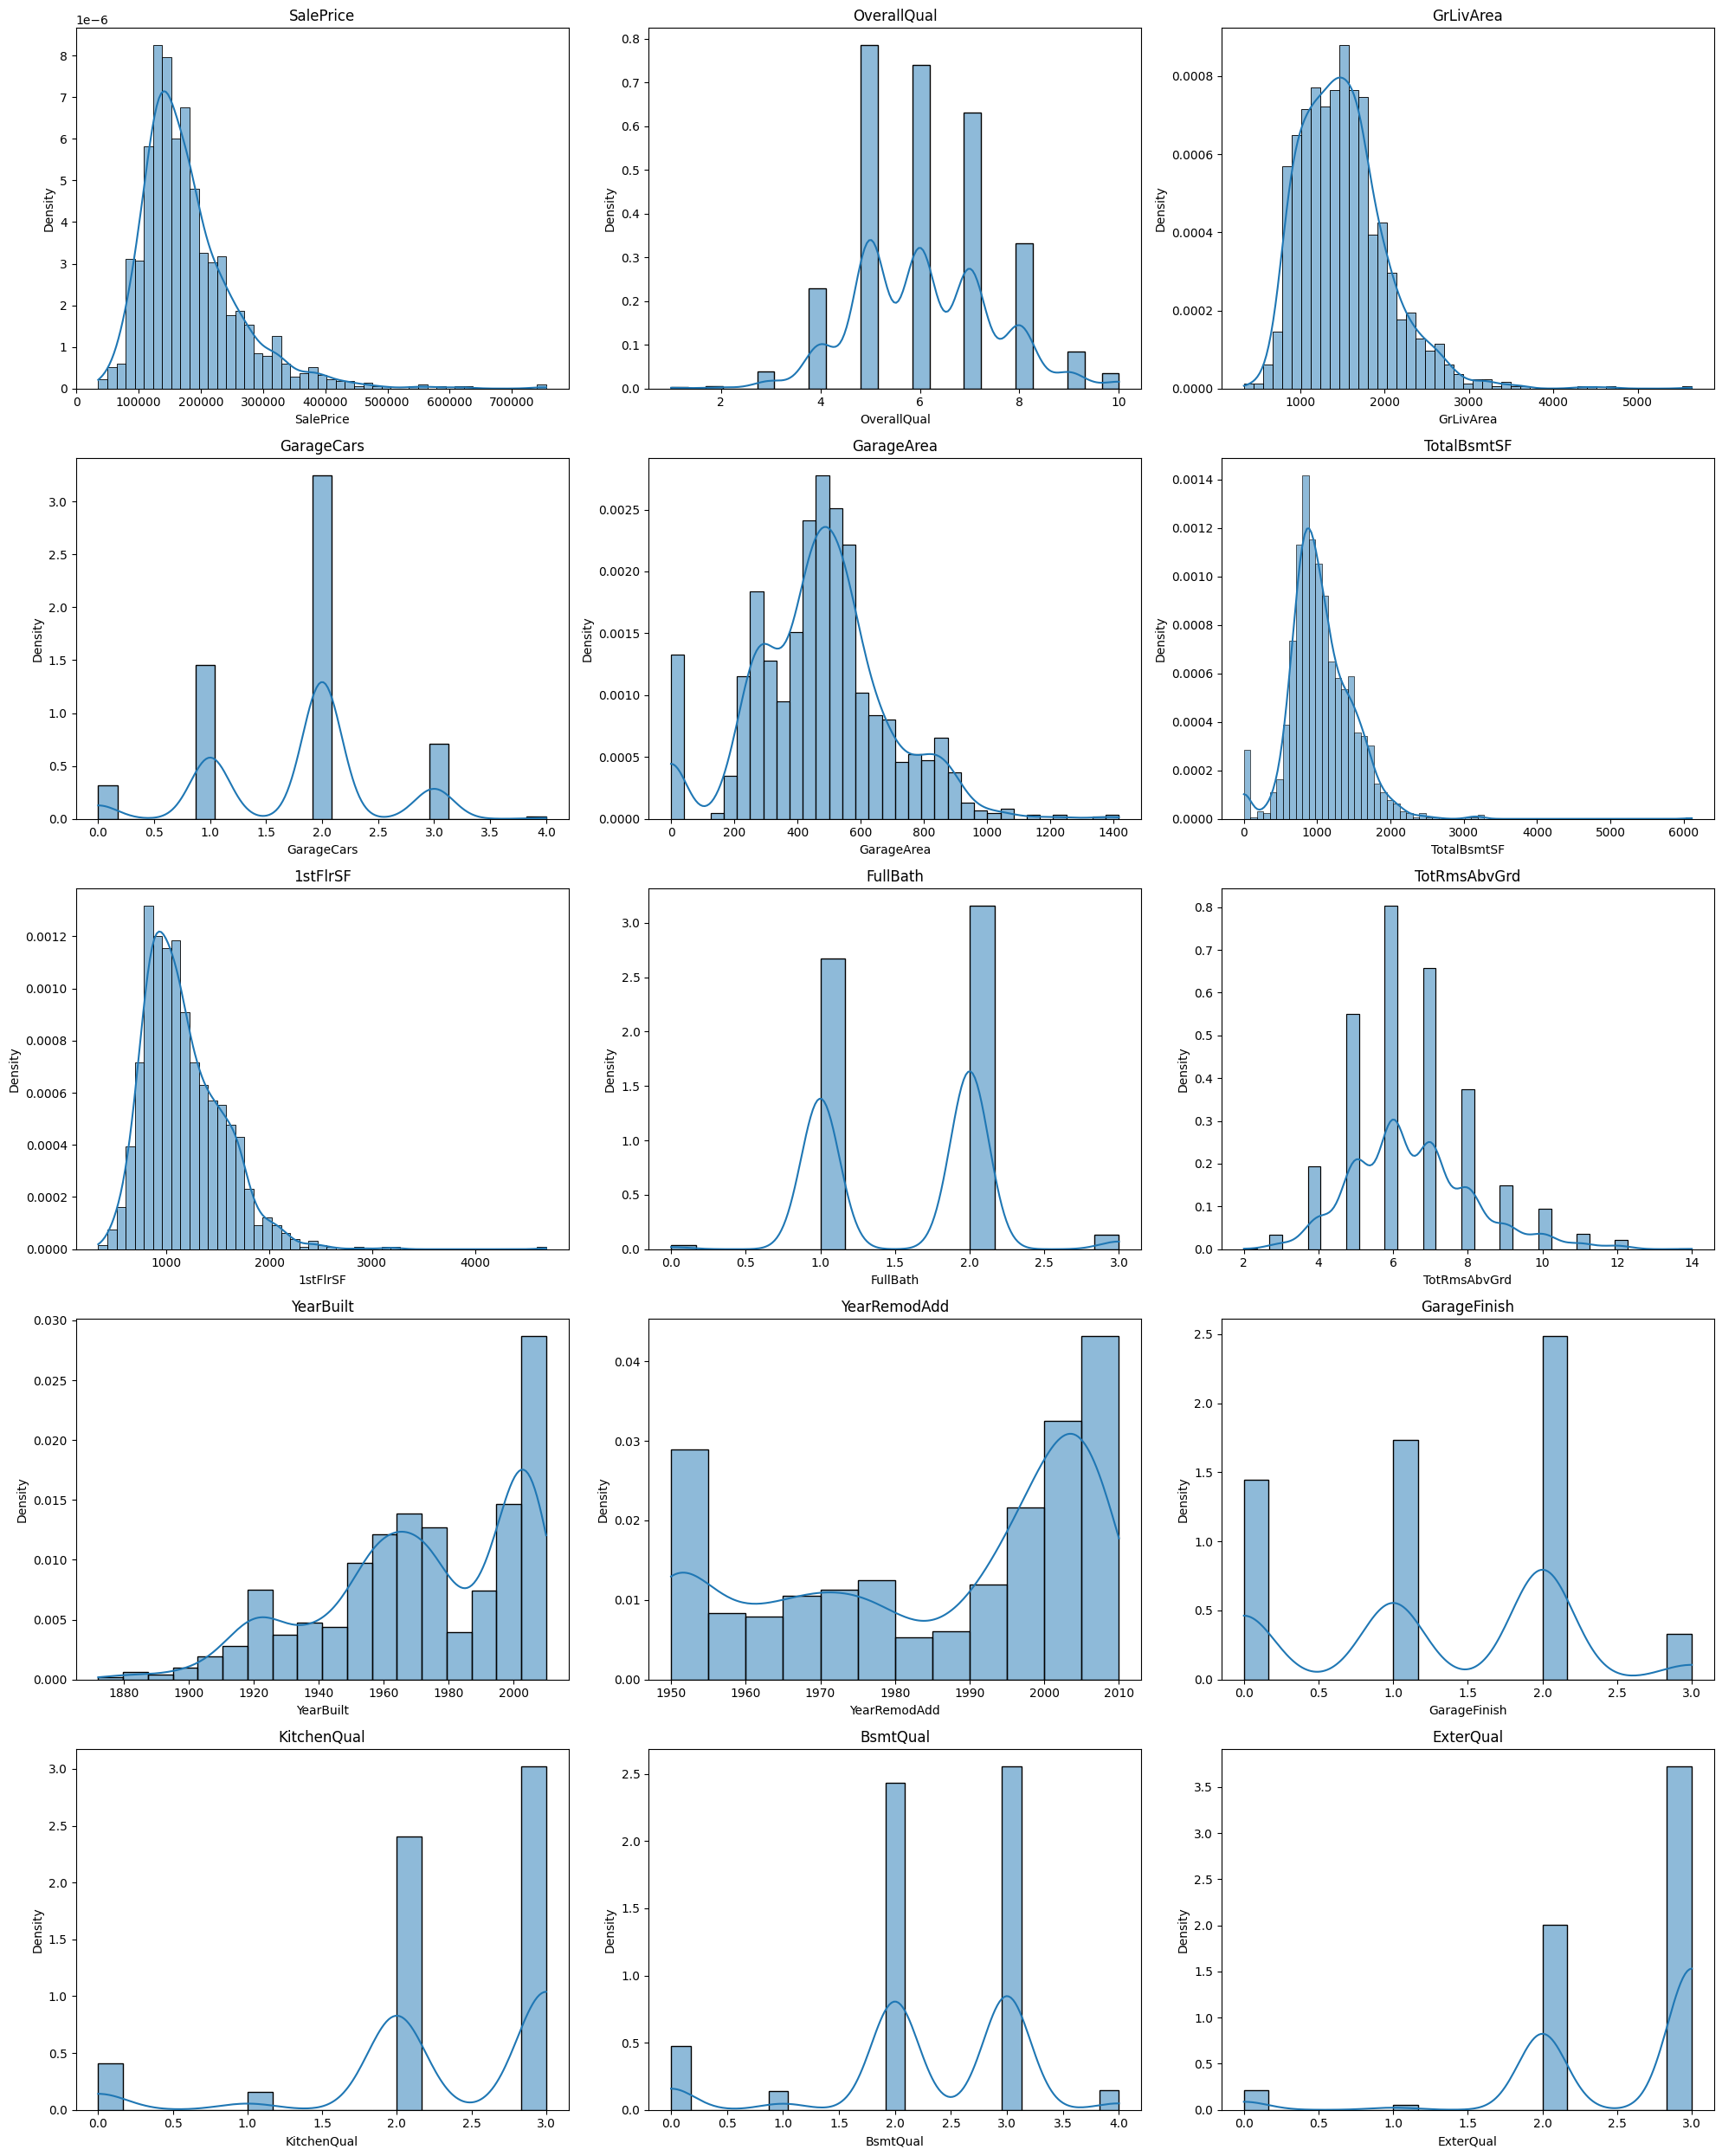

In [86]:
plot_histograms(data, n_cols=3)


In [87]:
q = data['TotalBsmtSF'].quantile(0.99)
data_1 = data[data['TotalBsmtSF'] < q]

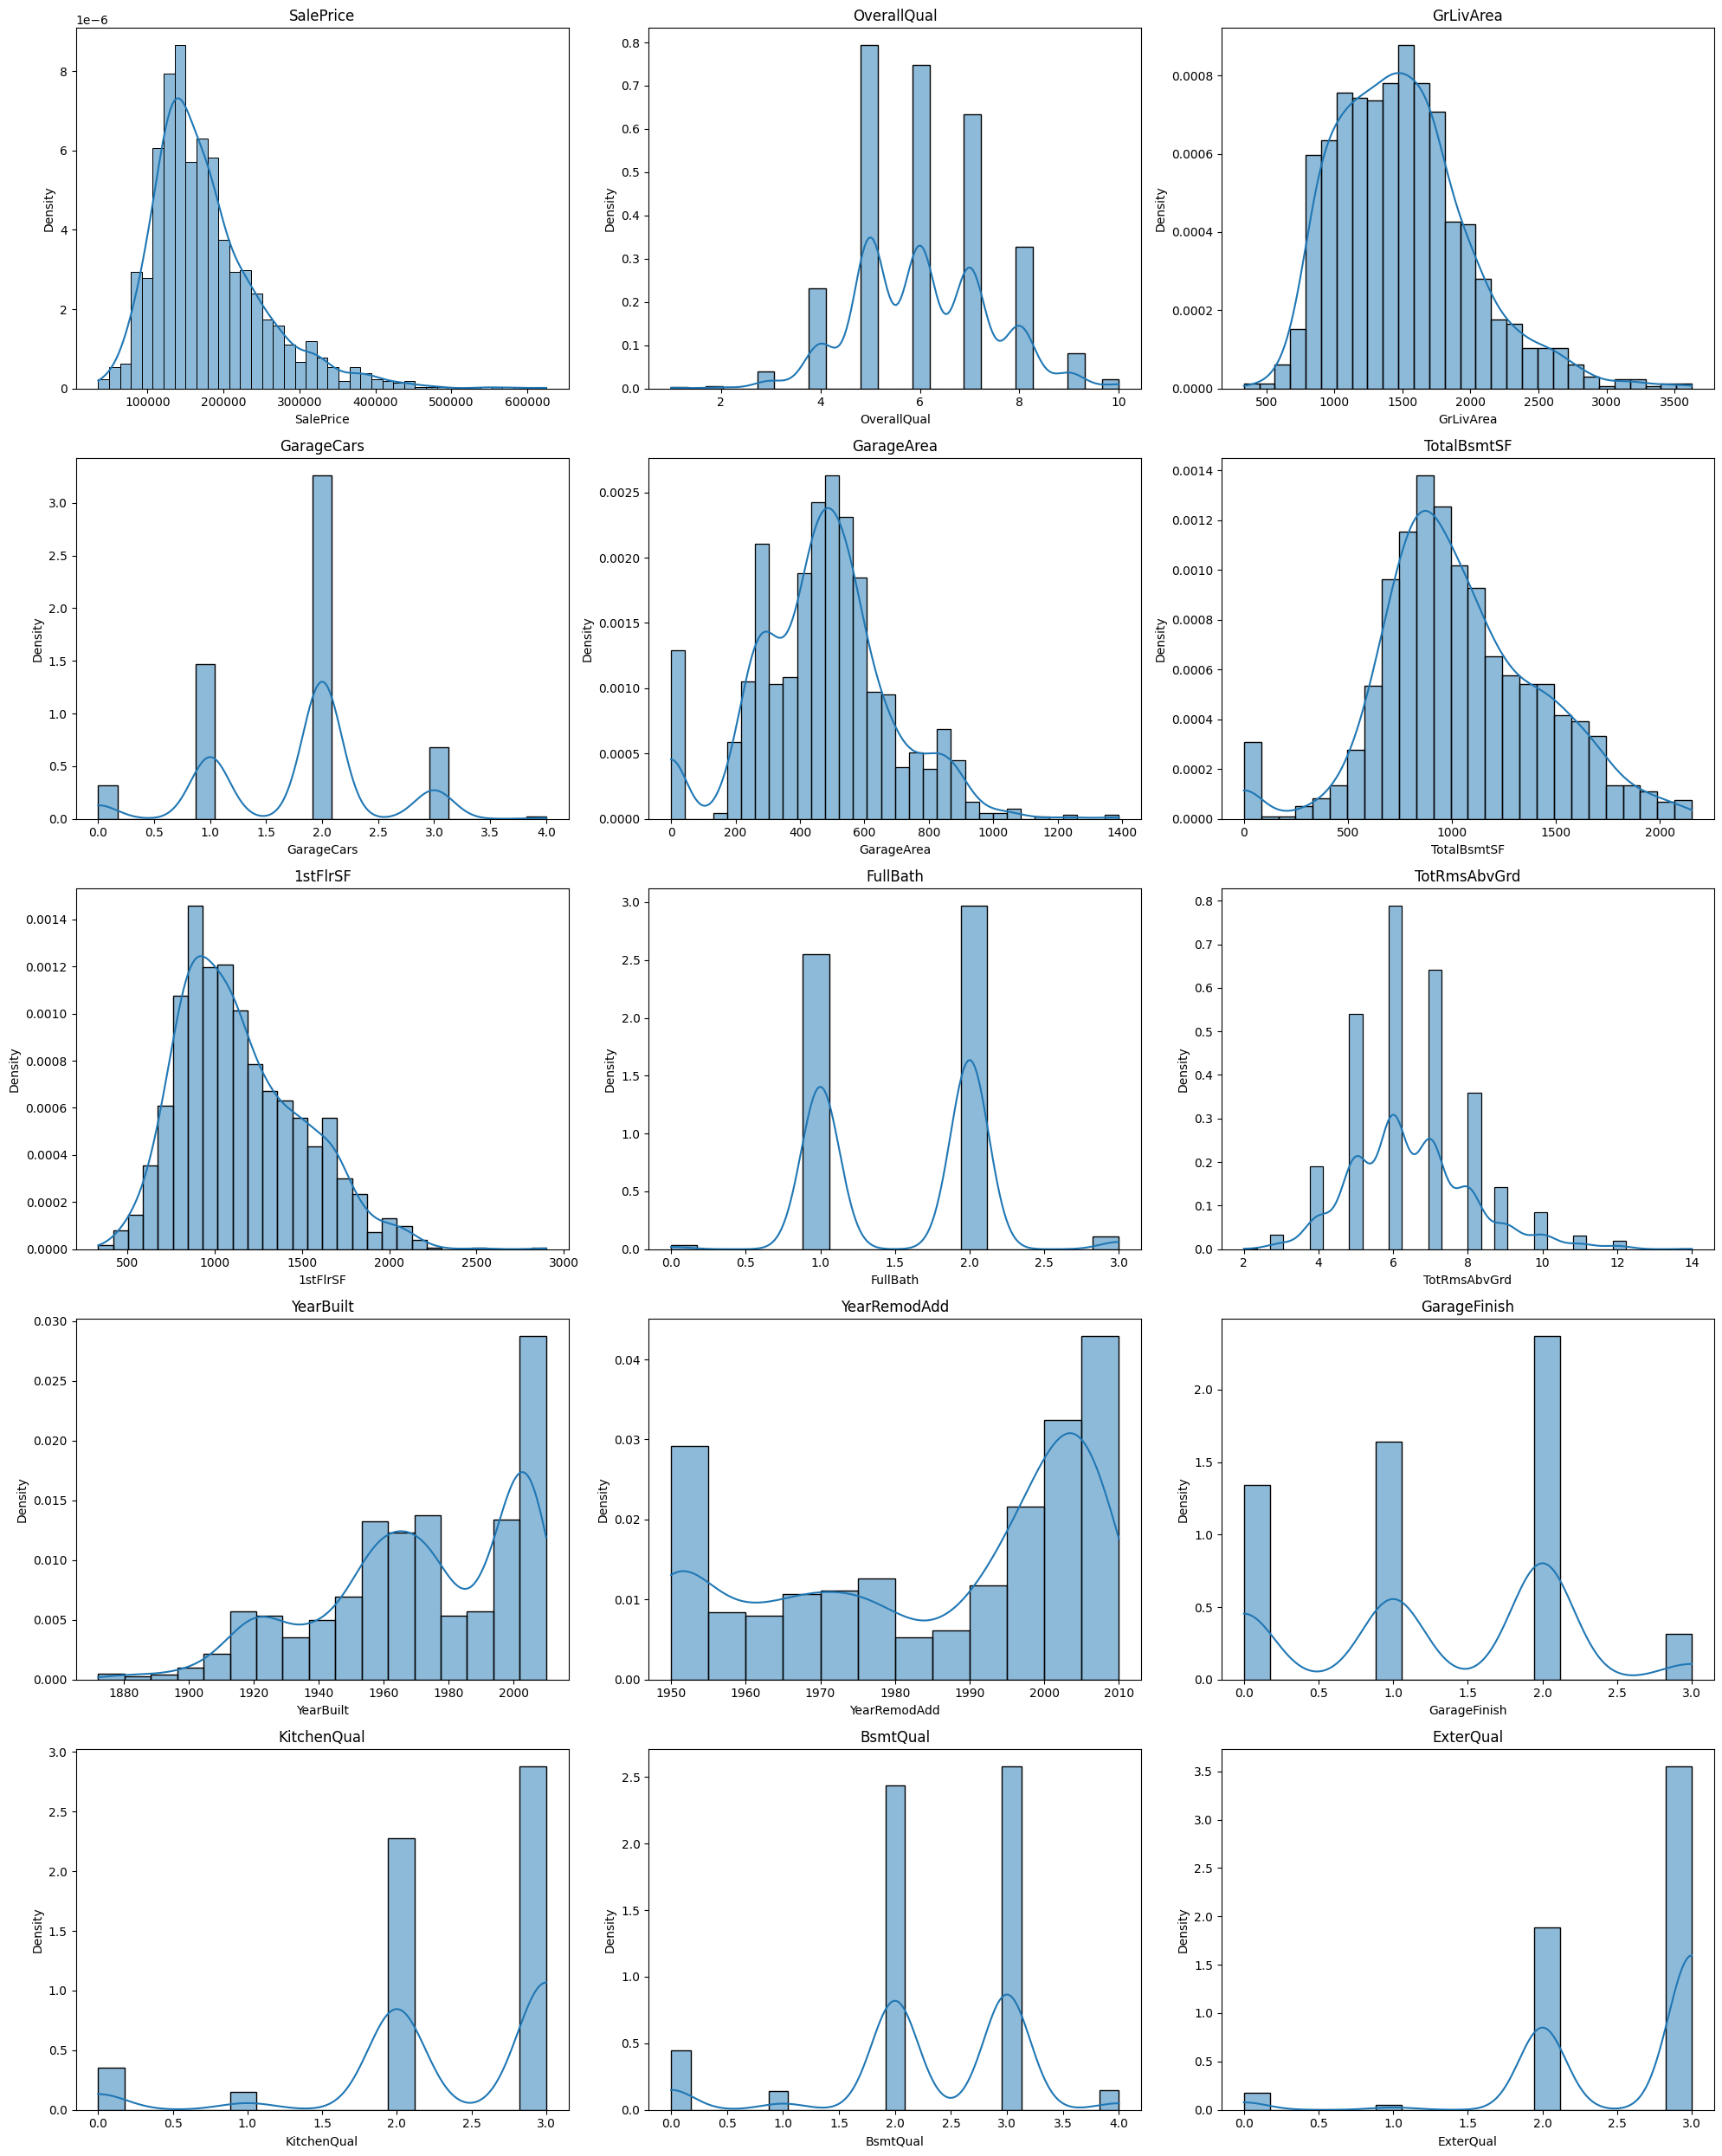

In [88]:
plot_histograms(data_1, n_cols=3)

In [89]:
q = data_1['SalePrice'].quantile(0.999)
data_2 = data_1[data_1['SalePrice'] < q]

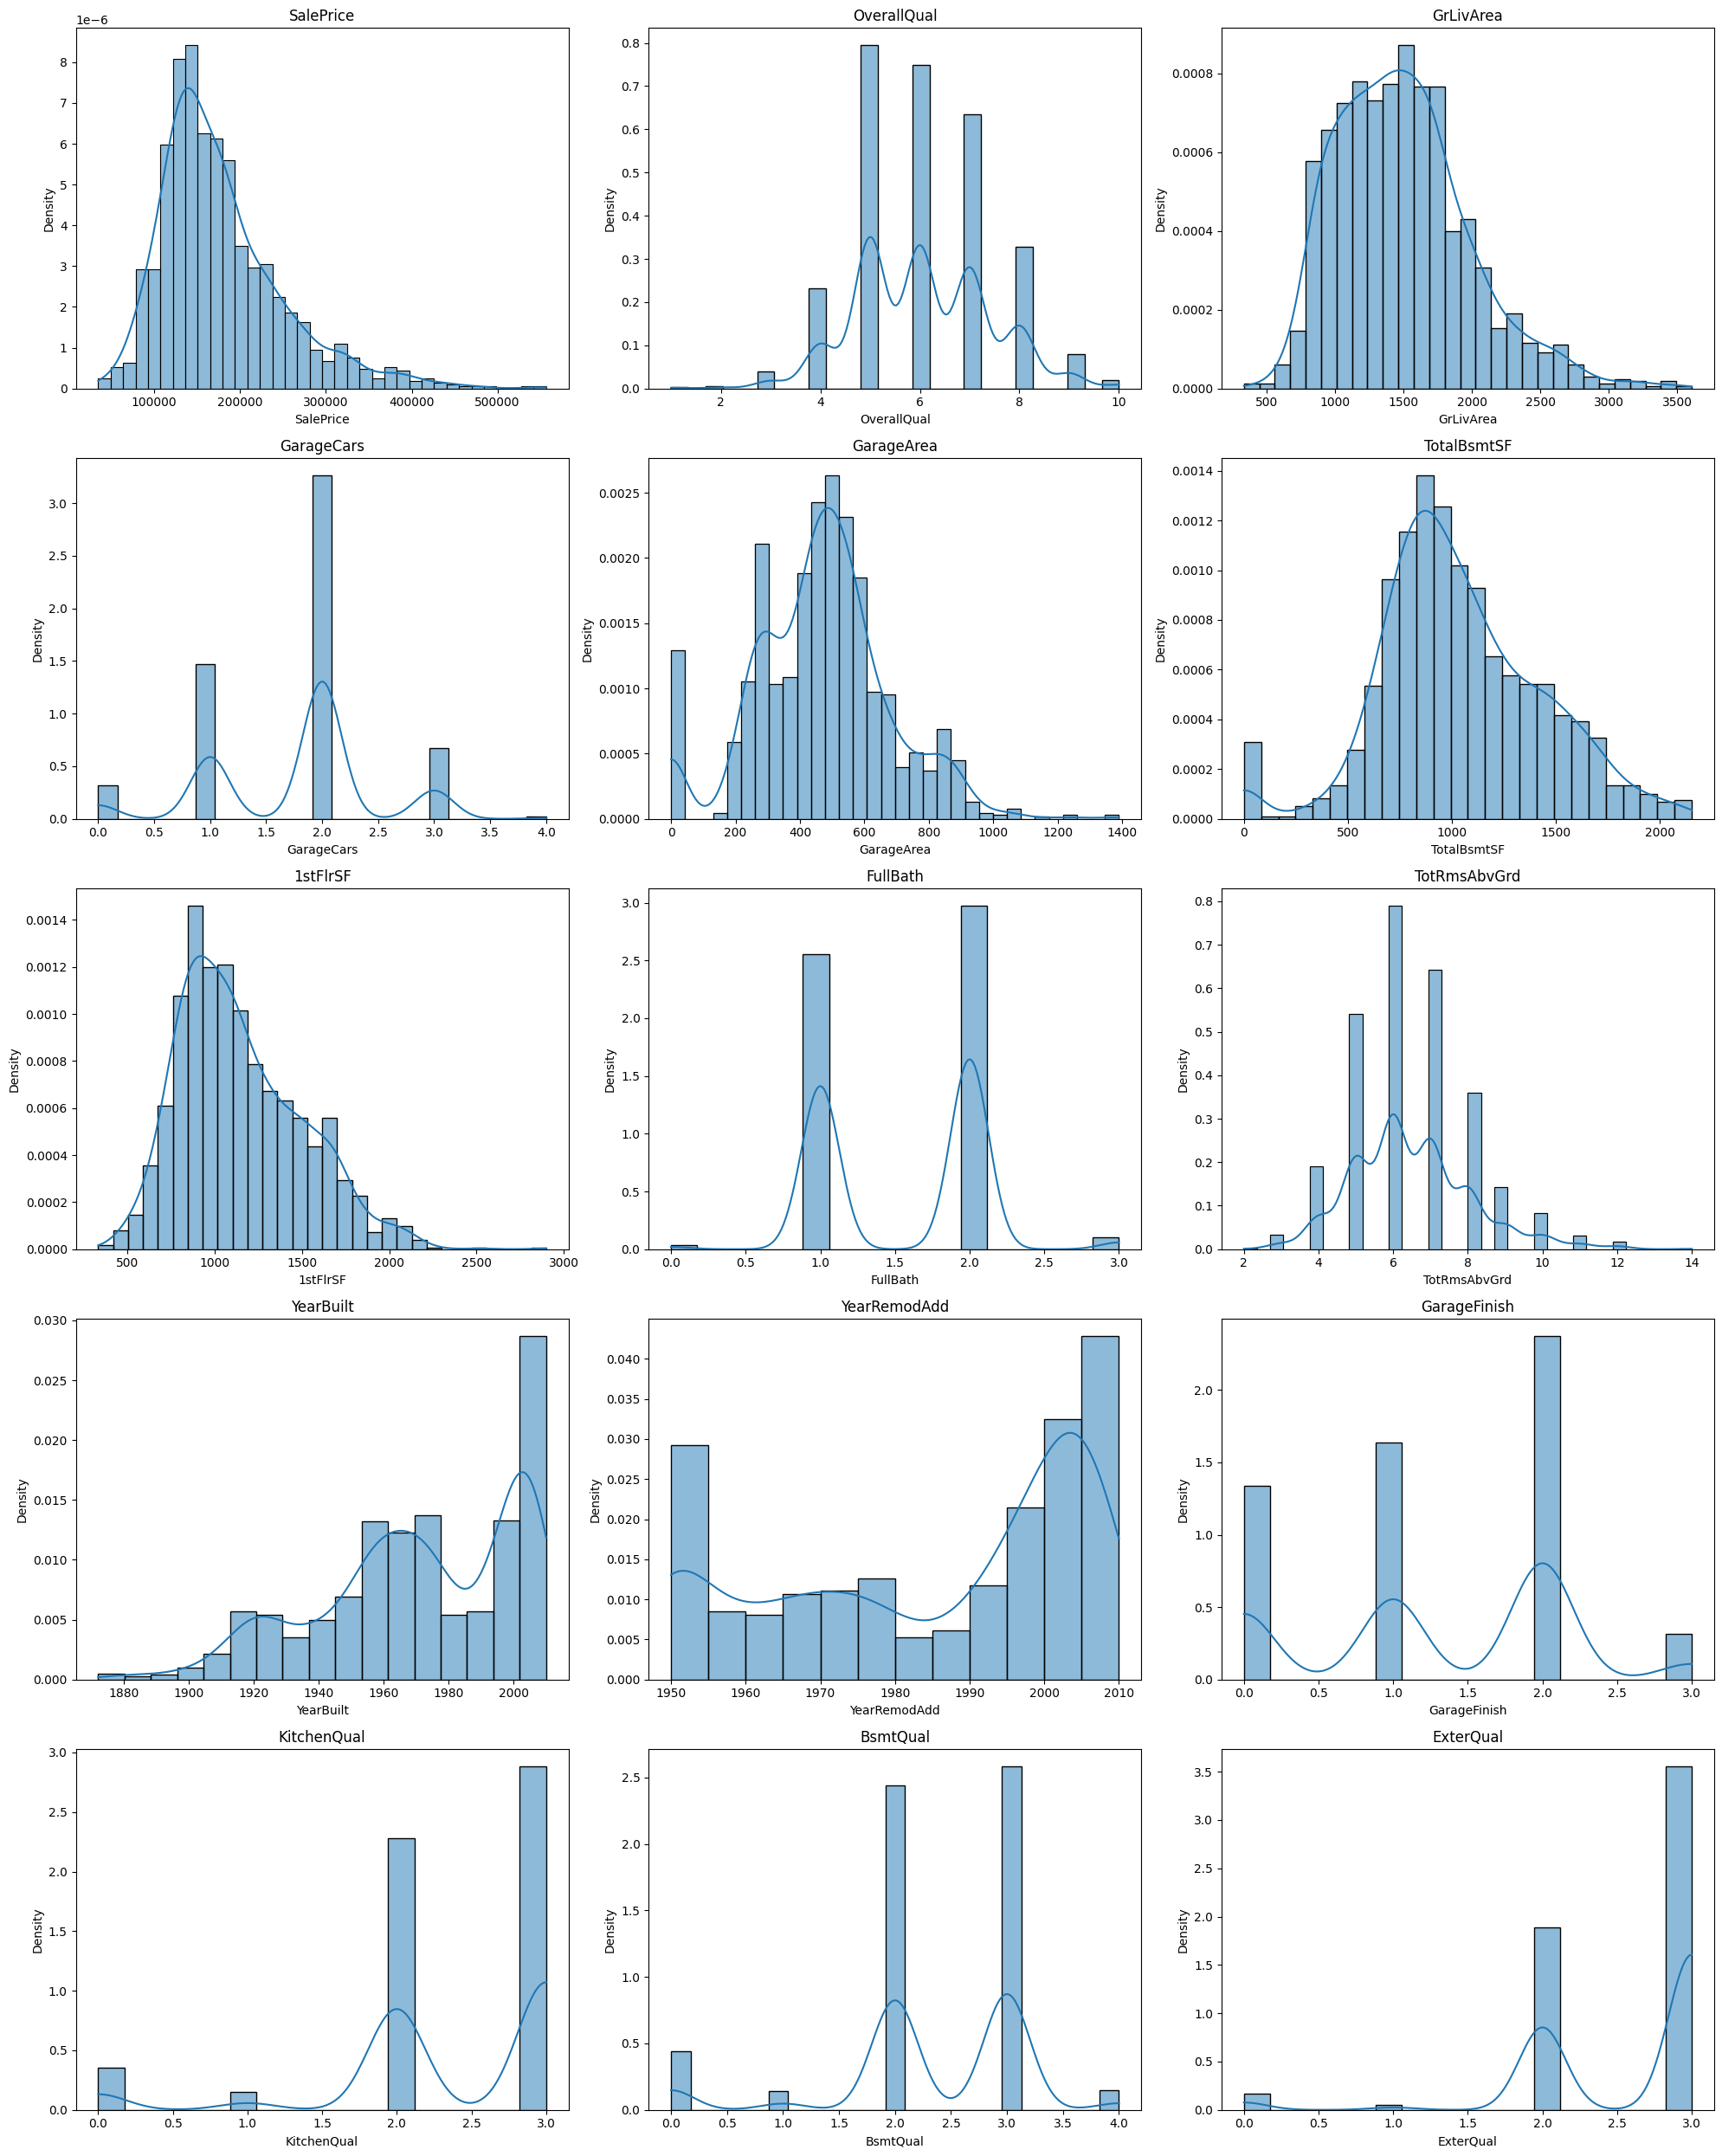

In [90]:
plot_histograms(data_2, n_cols=3)

In [91]:
data_cleaned = data.reset_index(drop=True)

In [92]:
data_cleaned.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish,KitchenQual,BsmtQual,ExterQual
0,208500,7,1710,2,548,856,856,2,8,2003,2003,1,2,2,2
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1,3,2,3
2,223500,7,1786,2,608,920,920,2,6,2001,2002,1,2,2,2
3,140000,7,1717,3,642,756,961,1,7,1915,1970,2,2,3,3
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,1,2,2,2


In [93]:
targets = data_cleaned['SalePrice']
inputs = data_cleaned.drop(['SalePrice'], axis=1)
inputs_column = inputs.columns

In [94]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [95]:
inputs_scaled = scaler.transform(inputs)

In [96]:
inputs_scaled_df = pd.DataFrame(inputs_scaled, columns=inputs_column)

In [97]:
inputs_scaled_df.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish,KitchenQual,BsmtQual,ExterQual
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03
mean,1.387018e-16,-1.277517e-16,1.216683e-16,-1.216683e-17,2.457699e-16,6.509253e-17,1.180182e-16,-1.022014e-16,1.046347e-15,4.496860e-15,9.246789e-17,6.205082e-17,0.000000,-1.387018e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343,1.000343e+00
min,-3.688413e+00,-2.249120e+00,-2.365440e+00,-2.212963e+00,-2.411167e+00,-2.144172e+00,-2.841822e+00,-2.780469e+00,-3.287824e+00,-1.689368e+00,-1.438891e+00,-2.819365e+00,-2.564729,-3.660830e+00
25%,-7.951515e-01,-7.347485e-01,-1.026858e+00,-6.479160e-01,-5.966855e-01,-7.261556e-01,-1.026041e+00,-9.341298e-01,-5.719226e-01,-8.656586e-01,-3.184746e-01,-4.093691e-01,-0.339830,-7.779758e-01
50%,-7.183611e-02,-9.797004e-02,3.117246e-01,3.284429e-02,-1.503334e-01,-1.956933e-01,7.897405e-01,-3.186833e-01,5.737148e-02,4.425864e-01,-3.184746e-01,7.956287e-01,-0.339830,6.634514e-01
75%,6.514792e-01,4.974036e-01,3.117246e-01,4.820057e-01,5.491227e-01,5.915905e-01,7.897405e-01,2.967633e-01,9.516316e-01,9.271216e-01,8.019420e-01,7.956287e-01,0.772619,6.634514e-01
max,2.821425e+00,7.855574e+00,2.988889e+00,4.421526e+00,1.152095e+01,9.132681e+00,2.605522e+00,4.604889e+00,1.282839e+00,1.217843e+00,1.922359e+00,7.956287e-01,1.885069,6.634514e-01


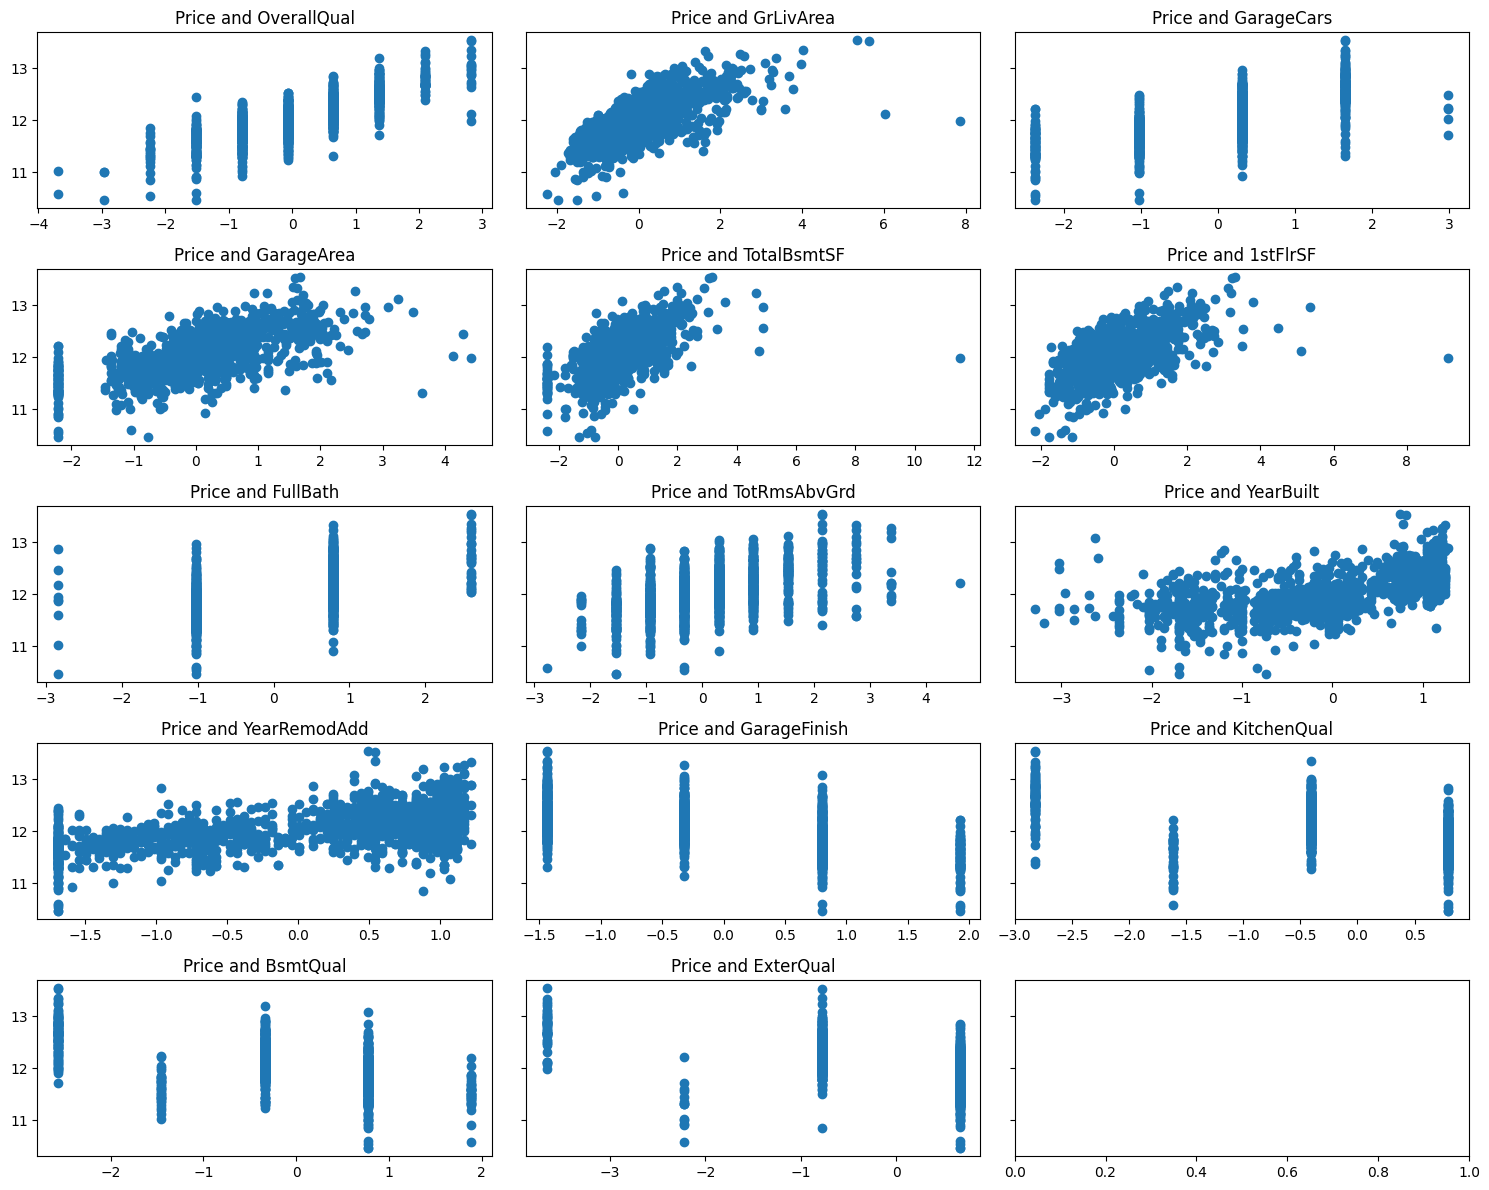

In [98]:
f, axes = plt.subplots(5, 3, sharey=True, figsize=(15, 12)) 
axes = axes.flatten() 

for i, col in enumerate(inputs_column):
    axes[i].scatter(inputs_scaled_df[col], target)
    axes[i].set_title(f'Price and {col}')

plt.tight_layout()
plt.show()

In [99]:
log_price = np.log(targets)
target = log_price

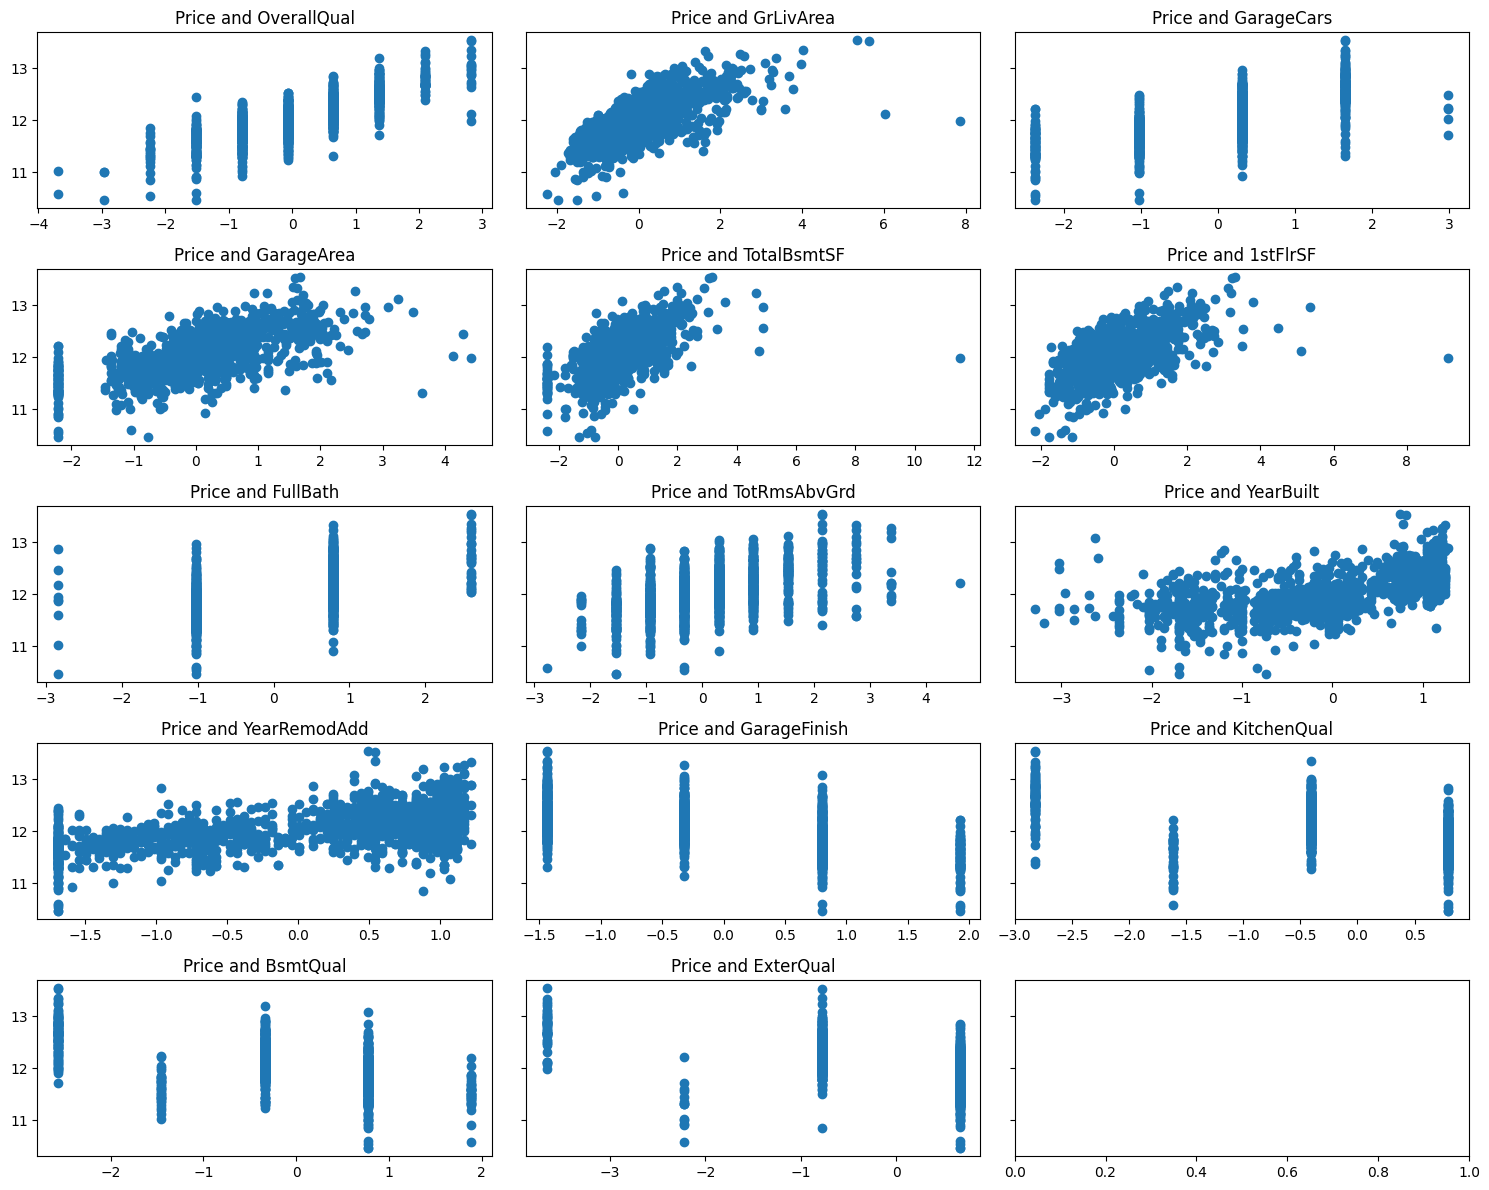

In [102]:
f, axes = plt.subplots(5, 3, sharey=True, figsize=(15, 12)) 
axes = axes.flatten() 

for i, col in enumerate(inputs_column):
    axes[i].scatter(inputs_scaled_df[col], target)
    axes[i].set_title(f'Price and {col}')

plt.tight_layout()
plt.show()

In [103]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inputs_scaled_df.values, i) for i in range(inputs_scaled_df.shape[1])]
vif['features'] = inputs_scaled_df.columns

In [104]:
vif

,VIF,features
0,3.173478,OverallQual
1,5.050097,GrLivArea
2,5.455890,GarageCars
3,4.954363,GarageArea
4,3.810508,TotalBsmtSF
5,3.774273,1stFlrSF
6,2.221012,FullBath
7,3.363217,TotRmsAbvGrd
8,2.627899,YearBuilt
9,1.850171,YearRemodAdd
